<a href="https://colab.research.google.com/github/dongyyyyy/ColabDeepLearning/blob/master/MakingDeepLearningModelUsingNumpy/tensorflowExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import csv

def createRandomArray():
    result = np.random.randint(0,2,3,dtype=int)
    if(result[0]==0 and result[1]==0 and result[2] ==0):
        output = 1
    elif(result[0]==0 and result[1]==0 and result[2] == 1):
        output = 2
    elif(result[0]==0 and result[1]==1 and result[2] ==0):
        output = 3
    elif (result[0] == 0 and result[1] == 1 and result[2] == 1):
        output = 4
    elif (result[0] == 1 and result[1] == 0 and result[2] == 0):
        output = 5
    elif (result[0] == 1 and result[1] == 0 and result[2] == 1):
        output = 6
    elif (result[0] == 1 and result[1] == 1 and result[2] == 0):
        output = 7
    elif (result[0] == 1 and result[1] == 1 and result[2] == 1):
        output = 8
    noise = np.random.normal(0, 0.1, 3)
    result = result - noise
    return result , output

if __name__ == "__main__":
    saveData = []
    csvfile = open("TrainDataset.csv","w",newline="")
    csvwriter = csv.writer(csvfile)

    for i in range(20000):
        array,output = createRandomArray()
        output = np.reshape(output,(1))
        result = np.concatenate([array,output],axis=-1)
        csvwriter.writerow(result)

    csvfile.close()

    csvfile = open("TestDataset.csv", "w", newline="")
    csvwriter = csv.writer(csvfile)

    for i in range(1000):
        array,output = createRandomArray()
        output = np.reshape(output,(1))
        result = np.concatenate([array,output],axis=-1)
        csvwriter.writerow(result)

    csvfile.close()

In [0]:
import numpy as np
import csv

def createRandomArray():
    result = np.random.randint(0,2,3,dtype=int)
    if(result[0]==0 and result[1]==0 and result[2] ==0):
        output = 1
    elif(result[0]==0 and result[1]==0 and result[2] == 1):
        output = 2
    elif(result[0]==0 and result[1]==1 and result[2] ==0):
        output = 3
    elif (result[0] == 0 and result[1] == 1 and result[2] == 1):
        output = 4
    elif (result[0] == 1 and result[1] == 0 and result[2] == 0):
        output = 5
    elif (result[0] == 1 and result[1] == 0 and result[2] == 1):
        output = 6
    elif (result[0] == 1 and result[1] == 1 and result[2] == 0):
        output = 7
    elif (result[0] == 1 and result[1] == 1 and result[2] == 1):
        output = 8
    noise = np.random.normal(0, 0.3, 3)
    result = result - noise
    return result , output

if __name__ == "__main__":
    saveData = []
    csvfile = open("TrainDataset_03.csv","w",newline="")
    csvwriter = csv.writer(csvfile)

    for i in range(20000):
        array,output = createRandomArray()
        output = np.reshape(output,(1))
        result = np.concatenate([array,output],axis=-1)
        csvwriter.writerow(result)

    csvfile.close()

    csvfile = open("TestDataset_03.csv", "w", newline="")
    csvwriter = csv.writer(csvfile)

    for i in range(1000):
        array,output = createRandomArray()
        output = np.reshape(output,(1))
        result = np.concatenate([array,output],axis=-1)
        csvwriter.writerow(result)

    csvfile.close()

In [12]:
!ls

sample_data	    TestDataset.csv	 TrainDataset.csv
TestDataset_03.csv  TrainDataset_03.csv


In [0]:
import numpy as np

def HandFunction(h,f):
    result = np.array(np.zeros([len(h[0]), len(f[0])]))
    h = h.sum(axis=0)
    f = f.sum(axis=0)
    for i in range(len(h)):
        for j in range(len(f)):
            result[i][j] = h[i] * f[j]
    return result

def HandFunction1(h,f):
    result = np.array(np.zeros([len(f),len(f[0])]))
    for i in range(len(f)): # 100
        for j in range(len(f[0])): # 24
            result[i][j] = h[j] * f[i][j] # 24 , (100,24) -> (100,24)
    return result

def HandFunction2(h,f):
    result = np.array(np.zeros([len(h),len(f[0])]))
    for i in range(len(f[0])): # 24
        for j in range(len(h)): # 100
            result[j][i] = h[j] * f[j][i] # (100) , (100,24) -> (100,24)
    return result


def ODivideFunction(h,f):
    result = np.array(np.zeros([len(h), len(h[0])]))
    for i in range(len(h)): # 100
        for j in range(len(h[0])): # 8
            result[i][j] = h[i][j] / f[i]
    return result

def MakeFristOne(h):
    for i in range(len(h)):
        h[i][0] = 1.
    return h
  
def RetrunOneHot(input):
        if input == 1:
            return [1, 0, 0, 0, 0, 0, 0, 0]
        elif input == 2:
            return [0, 1, 0, 0, 0, 0, 0, 0]
        elif input == 3:
            return [0, 0, 1, 0, 0, 0, 0, 0]
        elif input == 4:
            return [0, 0, 0, 1, 0, 0, 0, 0]
        elif input == 5:
            return[0, 0, 0, 0, 1, 0, 0, 0]
        elif input == 6:
            return [0, 0, 0, 0, 0, 1, 0, 0]
        elif input == 7:
            return [0, 0, 0, 0, 0, 0, 1, 0]
        elif input == 8:
            return [0, 0, 0, 0, 0, 0, 0, 1]
        else :
          return [0, 0, 0, 0, 0, 0, 0, 0]

In [0]:
import numpy as np
from math import exp

learning_rate = 0.001


def V_Sigmoid():
    sigmoid = np.vectorize(Sigmoid)
    return sigmoid

def V_ReLU():
    relu = np.vectorize(ReLU)
    return relu

def Sigmoid(x):
    try:
        return 1 / (1 + exp(-x))
    except OverflowError:
        return 1.


def ReLU(x):
    return max(0, x)


if __name__ == "__main__":

    batch = 100
    epoch = 20
    startNumber = 0

    data = np.loadtxt('TrainDataset.csv', delimiter=',', dtype=np.float32)
    train_x_data = data[:, 0:-1]
    bias = [[1.] * 1 for i in range(len(train_x_data))]
    train_x_data_bias = np.concatenate((bias, train_x_data), axis=1)
    train_y_data = data[:, [-1]]
    train_y_data_onehot = []
    print("데이터 총 개수 : ", len(train_y_data))
    for i in range(len(train_y_data)):
        if train_y_data[i] == 1:
            train_y_data_onehot.append([1, 0, 0, 0, 0, 0, 0, 0])
        elif train_y_data[i] == 2:
            train_y_data_onehot.append([0, 1, 0, 0, 0, 0, 0, 0])
        elif train_y_data[i] == 3:
            train_y_data_onehot.append([0, 0, 1, 0, 0, 0, 0, 0])
        elif train_y_data[i] == 4:
            train_y_data_onehot.append([0, 0, 0, 1, 0, 0, 0, 0])
        elif train_y_data[i] == 5:
            train_y_data_onehot.append([0, 0, 0, 0, 1, 0, 0, 0])
        elif train_y_data[i] == 6:
            train_y_data_onehot.append([0, 0, 0, 0, 0, 1, 0, 0])
        elif train_y_data[i] == 7:
            train_y_data_onehot.append([0, 0, 0, 0, 0, 0, 1, 0])
        elif train_y_data[i] == 8:
            train_y_data_onehot.append([0, 0, 0, 0, 0, 0, 0, 1])
    W = np.random.rand(4,8)

    def forward(x, y):

        z1 = np.dot(x,W)
        o = ODivideFunction(np.exp(z1), np.sum(np.exp(z1), axis=1))
        e = np.mean(-np.sum(y * np.log(o), axis=1))

        return e, o, z1


    def backward(x, y, W, input_data):
        local_param = (x-y)
        result = HandFunction(input_data,local_param)
        delta_o = (-learning_rate)*result
        NW = W + delta_o

        return NW

    def Accuracy(x,y,batch):
        z1 = np.dot(x,W)
        o = ODivideFunction(np.exp(z1), np.sum(np.exp(z1), axis=1))
        accuracy = 0.
        for i in range(batch):
            if (np.argmax(o[i])==np.argmax(y[i])):
                accuracy = accuracy + 1.
        return accuracy/batch * 100

    maxBatch = int(len(train_x_data_bias) / batch)
    print("batch size   = ", batch)
    print("batch Number = ", maxBatch)
    count = 0
    for i in range(epoch):  # 10 번 반복
        Eavg = 0.
        startNumber = 0
        for j in range(maxBatch):  # 200번 반복
            x_batch = train_x_data_bias[startNumber:startNumber + 100]
            y_batch = train_y_data_onehot[startNumber:startNumber + 100]
            if (len(x_batch) != 0):
                Eav, error, z1 = forward(x_batch, y_batch)
                W = backward(error, y_batch, W,x_batch)
                # print(W1)
                Eavg = Eavg + Eav
                startNumber = startNumber + 100
        print("Epoch ",i+1,"Eavg : ",Eavg/maxBatch)

    test = np.loadtxt('TestDataset.csv', delimiter=',', dtype=np.float32)
    test_x_data = data[:, 0:-1]
    test_bias = [[1.] * 1 for i in range(len(test_x_data))]
    test_x_data_bias = np.concatenate((test_bias, train_x_data), axis=1)
    test_y_data = data[:, [-1]]
    test_y_data_onehot = []
    for i in range(len(test_y_data)):
        test_y_data_onehot.append(RetrunOneHot(test_y_data[i]))

    Eavg = 0.
    startNumber = 0
    Aavg = 0.
    for i in range(len(test_x_data_bias)): # 200번 반복
        x_batch = test_x_data_bias[startNumber:startNumber+batch]
        y_batch = test_y_data_onehot[startNumber:startNumber+batch]
        if(len(x_batch)!= 0):
            accuracy = Accuracy(x_batch,y_batch,batch)
            Aavg = Aavg + accuracy
            startNumber = startNumber + 100
    print("Aavg : {:.4f}%".format((Aavg/len(test_x_data_bias))*100))

데이터 총 개수 :  20000
batch size   =  100
batch Number =  200
Epoch  1 Eavg :  1.9427297312442096
Epoch  2 Eavg :  1.1478884706627688
Epoch  3 Eavg :  0.8201569427165246
Epoch  4 Eavg :  0.6487832306818427
Epoch  5 Eavg :  0.5399679957739402
Epoch  6 Eavg :  0.45849186505938627
Epoch  7 Eavg :  0.40585751013862753
Epoch  8 Eavg :  0.3669788907374947
Epoch  9 Eavg :  0.32605677813551365
Epoch  10 Eavg :  0.2850789975905618
Epoch  11 Eavg :  0.24535929164275877
Epoch  12 Eavg :  0.2093172536354702
Epoch  13 Eavg :  0.18094530624915095
Epoch  14 Eavg :  0.1606168188588763
Epoch  15 Eavg :  0.14633621978188
Epoch  16 Eavg :  0.13538347732034495
Epoch  17 Eavg :  0.12652569832717434
Epoch  18 Eavg :  0.11911511943172515
Epoch  19 Eavg :  0.11275976608919464
Epoch  20 Eavg :  0.1072040396938015
Aavg : 100.0000%


In [0]:
import numpy as np
from math import exp

learning_rate = 0.0001


def V_Sigmoid():
    sigmoid = np.vectorize(Sigmoid)
    return sigmoid

def V_ReLU():
    relu = np.vectorize(ReLU)
    return relu

def Sigmoid(x):
    try:
        return 1 / (1 + exp(-x))
    except OverflowError:
        return 1.


def ReLU(x):
    return max(0, x)


if __name__ == "__main__":

    batch = 100
    epoch = 10
    startNumber = 0

    # 데이터 가져오는 작업
    data = np.loadtxt('TrainDataset.csv', delimiter=',', dtype=np.float32) # 해당 txt파일에서 데이터를 가져옴
    train_x_data = data[:, 0:-1] # 열에서 가장 마지막 값을 제외한 모든 값
    bias = [[1.] * 1 for i in range(len(train_x_data))] 
    train_x_data_bias = np.concatenate((bias, train_x_data), axis=1) # bias값을 가장 맨 앞 (0)위치에 이어붙인다
    train_y_data = data[:, [-1]] # 마지막 값 ( classes )을 y data ( label )로 저장
    train_y_data_onehot = [] # y_data값은 1~8사이의 값이므로 이를 one_hot인코딩을 하여 값을 저장
    print("데이터 총 개수 : ", len(train_y_data)) 
    for i in range(len(train_y_data)):
            train_y_data_onehot.append(RetrunOneHot(train_y_data[i]))
    W1 = np.random.rand(4,24) # input과 1번 layer의 연결강도를 의미하는 W1 가중치
    W2 = np.random.rand(24,8) # 1번 layer와 출력 layer의 연결강도를 의미하는 W2 가중치


    def forward(x, y):
        z1 = np.dot(x,W1)
        h1 = MakeFristOne(z1)

        z2 = np.dot(h1,W2)
        o = ODivideFunction(np.exp(z2), np.sum(np.exp(z2),axis=1))
        e = np.mean(-np.sum(y*np.log(o),axis=1))


        return e, o, h1


    def backward(x, y, W1, W2, input_data,h1): # x = O(n) , y = label , W = Weight
        local_param2 = (x - y)
        result = HandFunction(h1, local_param2)
        delta_o = (-learning_rate) * result
        NW2 = W2 + delta_o

        local_param1 = np.dot(local_param2,np.transpose(W2))
        result = HandFunction(input_data, local_param1)
        delta_h1 = (-learning_rate) * result
        NW1 = W1 + delta_h1
        
        return NW1, NW2

    def Accuracy(x, y, batch):
        z1 = np.dot(x,W1)
        h1 = MakeFristOne(z1)

        z2 = np.dot(h1,W2)
        o = ODivideFunction(np.exp(z2), np.sum(np.exp(z2),axis=1))
        accuracy = 0.
        for i in range(batch):
            if (np.argmax(o[i])==np.argmax(y[i])):
                accuracy = accuracy + 1.
                
        return float(accuracy)/batch * 100, o

    maxBatch = int(len(train_x_data_bias) / batch)
    print("batch size   = ", batch)
    print("batch Number = ", maxBatch)
    count = 0
    for i in range(epoch):  # 10 번 반복
        Eavg = 0.
        startNumber = 0
        for j in range(maxBatch):  # 200번 반복
            x_batch = train_x_data_bias[startNumber:startNumber + 100]
            y_batch = train_y_data_onehot[startNumber:startNumber + 100]
            if (len(x_batch) != 0):
                Eav, error, h1 = forward(x_batch, y_batch)
                W1,W2 = backward(error, y_batch, W1,W2,x_batch,h1 )
                # print(W1)
                Eavg = Eavg + Eav
                startNumber = startNumber + 100
        print("Epoch ",i+1,"Eavg : ",Eavg/maxBatch)

    test = np.loadtxt('TestDataset.csv', delimiter=',', dtype=np.float32)
    test_x_data = data[:, 0:-1]
    test_bias = [[1.] * 1 for i in range(len(test_x_data))]
    test_x_data_bias = np.concatenate((test_bias, train_x_data), axis=1)
    test_y_data = data[:, [-1]]
    test_y_data_onehot = []
    for i in range(len(test_y_data)):
        test_y_data_onehot.append(RetrunOneHot(test_y_data[i]))

    Eavg = 0.
    startNumber = 0
    Aavg = 0.
    a = 0
    for i in range(len(test_x_data_bias)): # 200번 반복
        x_batch = test_x_data_bias[startNumber:startNumber+batch]
        y_batch = test_y_data_onehot[startNumber:startNumber+batch]
        if(len(x_batch)!= 0):
            accuracy, pred = Accuracy(x_batch,y_batch,batch)
            if( a == 0):
                print("Label : ", np.argmax(y_batch, axis=1))
                print("pred : ",np.argmax(pred,axis=1))
                a += 1
            Aavg = Aavg + accuracy
            startNumber = startNumber + 100
    print("Aavg : {}%".format((Aavg/len(test_x_data_bias))*100))

데이터 총 개수 :  20000
batch size   =  100
batch Number =  200
Epoch  1 Eavg :  1.9682248623906162
Epoch  2 Eavg :  1.5235499577187965
Epoch  3 Eavg :  1.2503493961525591
Epoch  4 Eavg :  1.0128076655413087
Epoch  5 Eavg :  0.8078905472675921
Epoch  6 Eavg :  0.6395129041272457
Epoch  7 Eavg :  0.5073271058685926
Epoch  8 Eavg :  0.4064794008198491
Epoch  9 Eavg :  0.3303766311641861
Epoch  10 Eavg :  0.27283334984482704
Label :  [6 5 3 3 1 7 0 0 0 4 7 7 5 4 5 4 5 0 7 7 2 6 4 1 1 2 0 0 6 4 7 6 3 1 4 4 6
 2 1 7 7 0 6 3 4 2 6 2 0 0 5 3 0 4 7 5 5 3 6 2 4 2 7 5 2 7 0 1 0 7 2 1 5 5
 6 0 3 4 3 5 0 2 1 4 7 1 1 1 4 7 3 6 0 1 5 4 3 5 1 0]
pred :  [6 5 3 3 1 7 0 0 0 4 7 7 5 4 5 4 5 0 7 7 2 6 4 1 1 2 0 0 6 4 7 6 3 1 4 4 6
 2 1 7 7 0 6 3 4 2 6 2 0 0 5 3 0 4 7 5 5 3 6 2 4 2 7 5 2 7 0 1 0 7 2 1 5 5
 6 0 3 4 3 5 0 2 1 4 7 1 1 1 4 7 3 6 0 1 5 4 3 5 1 0]
Aavg : 100.0%


In [24]:
import numpy as np
from math import exp


learning_rate = 0.0001 # learning rate

plt_Eavg = [] 
plt_Eavg2 = []

class Model:
    def __init__(self, batch): # 클래스 생성시 초기화
        self.W1 = np.random.rand(4,24) 
        self.W2 = np.random.rand(24,8)
        self.h1 = np.random.rand(batch, 24)

    def forward(self, input_data, input_truth): # 전 방향 
        z1 = np.dot(input_data, self.W1)
        self.h1 = MakeFristOne(z1)

        z2 = np.dot(self.h1, self.W2)
        o = ODivideFunction(np.exp(z2), np.sum(np.exp(z2),axis=1))
        e = np.mean(-np.sum(input_truth*np.log(o),axis=1))

        return e, o

    def backward(self, pred, truth, input_data): # x = O(n) , y = label , W = Weight / backpropagation
        local_param2 = (pred - truth) # 국부적 기울기
        result = np.dot(np.transpose(self.h1), local_param2) # 국부적 기울기 * h1
        delta_o = (-learning_rate) * result # W2 변화량
        nw2 = self.W2 + delta_o # 다음 W2 = 현재 W2 + W2의 변화량

        local_param1 = np.dot(local_param2, np.transpose(self.W2)) # 국부적 기울기
        result = HandFunction(input_data, local_param1) # 국부적 기울기 * 입력값
        delta_h1 = (-learning_rate) * result # W1 변화량
        nw1 = self.W1 + delta_h1 # 다음 W1 = 현재 W1 + W1의 변화량

        self.W1 = nw1
        self.W2 = nw2

    def Accuracy(self, input_data, input_truth, batch): # 정확도 확인을 위한 함수
        z1 = np.dot(input_data, self.W1)
        h1 = MakeFristOne(z1)

        z2 = np.dot(h1, self.W2)
        o = ODivideFunction(np.exp(z2), np.sum(np.exp(z2), axis=1))
        accuracy = 0.
        for i in range(batch):
            if np.argmax(o[i]) == np.argmax(input_truth[i]): # truth와 pred이 일치할 경우
                accuracy = accuracy + 1.

        return accuracy/batch * 100, o

if __name__ == "__main__":

    batch = 100 # mini-batch size 한번에 100개의 이미지를 학습한 후 update
    epoch = 10 # 전체의 이미지 수를 10번 만큼 반복 학습
    startNumber = 0

    data = np.loadtxt('TrainDataset.csv', delimiter=',', dtype=np.float32) # 데이터 가져오기 
    train_x_data = data[:, 0:-1] # 맨 마지막 전까지의 데이터를 X 데이터 ( 입력 데이터 )
    bias = [[1.] * 1 for i in range(len(train_x_data))] # 입력 데이터에도 bias값 (+1)을 추가하기 위한 리스트 선언
    train_x_data_bias = np.concatenate((bias, train_x_data), axis=1) # 입력 데이터에 bias값 추가
    train_y_data = data[:, [-1]] # 마지막 데이터를 y 데이터 ( 정답 )
    train_y_data_onehot = [] # one_hot encoding을 통하여 데이터 변형

    data = np.loadtxt('TrainDataset_03.csv', delimiter=',', dtype=np.float32)
    train_x_data_03 = data[:, 0:-1]
    bias = [[1.] * 1 for i in range(len(train_x_data_03))]
    train_x_data_03_bias = np.concatenate((bias, train_x_data_03), axis=1)
    train_y_data_03 = data[:, [-1]]
    train_y_data_03_onehot = []


    print("데이터 총 개수 : ", len(train_y_data_03))
    for i in range(len(train_y_data)):
        train_y_data_onehot.append(RetrunOneHot(train_y_data[i]))
    for i in range(len(train_y_data_03)):
        train_y_data_03_onehot.append(RetrunOneHot(train_y_data_03[i]))

    maxBatch = int(len(train_x_data_03_bias) / batch)

    m1 = Model(batch) # 클래스 생성
    m2 = Model(batch) # 클래스 생성

    print("batch size   = ", batch)
    print("batch Number = ", maxBatch)
    count = 0
    for i in range(epoch):  # 10 번 반복
        Eavg = 0.
        Eavg2 = 0.
        startNumber = 0
        for j in range(maxBatch):  # 200번 반복 = 20000 / batch(100)
            x_batch = train_x_data_bias[startNumber:startNumber + 100]
            y_batch = train_y_data_onehot[startNumber:startNumber + 100]
            x_batch2 = train_x_data_03_bias[startNumber:startNumber + 100]
            y_batch2 = train_y_data_03_onehot[startNumber:startNumber + 100]
            if (len(x_batch) != 0):
                Eav, pred = m1.forward(x_batch, y_batch) # forward
                m1.backward(pred, y_batch, x_batch) # backward

                Eav2, pred2 = m2.forward(x_batch2, y_batch2)
                m2.backward(pred2, y_batch2, x_batch2)

                Eavg = Eavg + Eav
                Eavg2 = Eavg2 + Eav2
                startNumber = startNumber + 100
        print("Epoch ", i + 1, "Eavg : ", Eavg/maxBatch)
        plt_Eavg.append(Eavg/maxBatch) 
        print("Epoch ", i + 1, "Eavg2 : ", Eavg2 / maxBatch)
        plt_Eavg2.append(Eavg2/maxBatch)
    
    test = np.loadtxt('TestDataset.csv', delimiter=',', dtype=np.float32)
    test_x_data = test[:, 0:-1]
    test_bias = [[1.] * 1 for i in range(len(test_x_data))]
    test_x_data_bias = np.concatenate((test_bias, test_x_data), axis=1)
    test_y_data = test[:, [-1]]
    test_y_data_onehot = []
    for i in range(len(test_y_data)):
        test_y_data_onehot.append(RetrunOneHot(test_y_data[i]))

    test = np.loadtxt('TestDataset_03.csv', delimiter=',', dtype=np.float32)
    test_x_data_03 = test[:, 0:-1]
    test_x_data_03_bias = np.concatenate((test_bias, test_x_data_03), axis=1)
    test_y_data_03 = test[:, [-1]]
    test_y_data_03_onehot = []

    for i in range(len(test_y_data_03)):
        test_y_data_03_onehot.append(RetrunOneHot(test_y_data_03[i]))

    startNumber = 0
    Aavg = 0.
    Aavg2 = 0.
    a = 0
    for i in range(len(test_x_data_bias)): # 200번 반복
        x_batch = test_x_data_bias[startNumber:startNumber+batch]
        y_batch = test_y_data_onehot[startNumber:startNumber+batch]
        x_batch2 = test_x_data_03_bias[startNumber:startNumber+batch]
        y_batch2 = test_y_data_03_onehot[startNumber:startNumber+batch]
        if(len(x_batch)!= 0):
            accuracy, pred = m1.Accuracy(x_batch, y_batch, batch)
            accuracy2, pred2 = m2.Accuracy(x_batch2, y_batch2, batch)
            if(a == 0):
                print("Label : ", np.argmax(y_batch, axis=1))
                print("pred : ", np.argmax(pred, axis=1))
                a += 1
            Aavg = Aavg + accuracy
            Aavg2 = Aavg2 + accuracy2
            startNumber = startNumber + 100

    print("Aavg : {}%".format((float(Aavg)/len(test_x_data_bias))*100))

    print("Aavg2 : {:.4f}%".format((float(Aavg2) / len(test_x_data_03_bias))*100))

데이터 총 개수 :  20000
batch size   =  100
batch Number =  200
Epoch  1 Eavg :  1.9976866933866742
Epoch  1 Eavg2 :  1.749371875303527
Epoch  2 Eavg :  1.4151557665963386
Epoch  2 Eavg2 :  1.2777098326083831
Epoch  3 Eavg :  1.0600226523435325
Epoch  3 Eavg2 :  1.0182240833837484
Epoch  4 Eavg :  0.8006942585301678
Epoch  4 Eavg2 :  0.8540046075821733
Epoch  5 Eavg :  0.6060986434307954
Epoch  5 Eavg2 :  0.7447811615010326
Epoch  6 Eavg :  0.4622831569309941
Epoch  6 Eavg2 :  0.6691107317237901
Epoch  7 Eavg :  0.3581900910593195
Epoch  7 Eavg2 :  0.6147509764181321
Epoch  8 Eavg :  0.2834825808345769
Epoch  8 Eavg2 :  0.5744644636620466
Epoch  9 Eavg :  0.22952459882338194
Epoch  9 Eavg2 :  0.5438172184239161
Epoch  10 Eavg :  0.1899160345172842
Epoch  10 Eavg2 :  0.5199925120158524
Label :  [1 1 1 5 6 4 1 2 6 4 5 3 2 6 3 1 3 3 6 1 4 6 3 2 7 3 1 1 7 0 4 7 7 3 2 1 6
 6 1 6 3 3 4 7 4 4 6 5 4 1 3 5 2 3 3 1 0 4 7 3 4 2 6 3 2 4 6 6 5 7 2 2 1 6
 7 6 2 0 6 1 7 2 7 3 5 7 2 7 5 1 7 0 6 3 3 6 3 5 4 

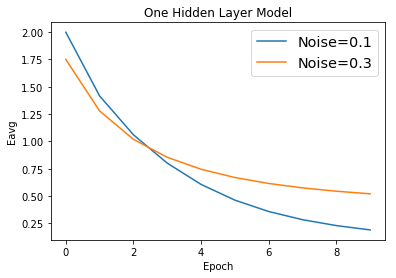

In [25]:
import matplotlib.pyplot as plt


x = range(0,10)

plt.xlabel('Epoch')
plt.ylabel('Eavg')

plt.title('One Hidden Layer Model')
plt.plot(x,plt_Eavg,label= "Noise=0.1")
plt.plot(x,plt_Eavg2,label = 'Noise=0.3')
plt.legend(fontsize='x-large')
plt.show()


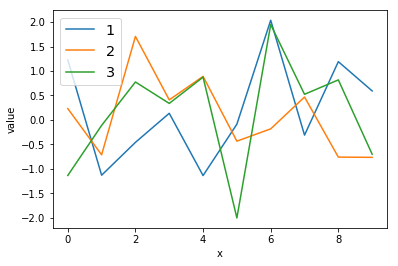

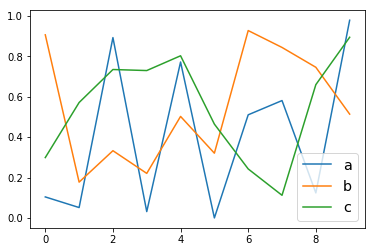

In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt

W = tf.Variable(tf.random_normal([3,10]))
W1 = tf.Variable(tf.random_uniform([3,10]))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

plt.xlabel('x')
plt.ylabel('value')
plt.plot(sess.run(W[0]),label = '1')
plt.plot(sess.run(W[1]),label = '2')
plt.plot(sess.run(W[2]),label = '3')
plt.legend(fontsize='x-large')
plt.show()

plt.plot(sess.run(W1[0]),label = 'a')
plt.plot(sess.run(W1[1]),label = 'b')
plt.plot(sess.run(W1[2]),label = 'c')
plt.legend(fontsize='x-large')
plt.show()

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

learning_rate1 = 0.1
learning_rate2 = 0.01
learning_rate3 = 0.001

class Model_Grad:
    def __init__(self, sess, name, learning_rate):
        self.sess = sess
        self.name = name
        self.learning_rate = learning_rate
        self._build_net()
        
    def _build_net(self):
        with tf.variable_scope(self.name):
            self.X = tf.placeholder(tf.float32, [None, 3])
            self.Y = tf.placeholder(tf.float32, [None, 8])

            W1 = tf.Variable(tf.random_normal([3, 24]))
            b1 = tf.Variable(tf.random_normal([24]))

            W2 = tf.Variable(tf.random_normal([24, 8]))
            b2 = tf.Variable(tf.random_normal([8]))

            h1 = tf.matmul(self.X, W1) + b1

            self.logits = tf.matmul(h1, W2) + b2

        # define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
            logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.GradientDescentOptimizer(
            learning_rate=self.learning_rate).minimize(self.cost)

        correct_prediction = tf.equal(
            tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test):
        return self.sess.run(self.logits, feed_dict={self.X: x_test})

    def get_accuracy(self, x_test, y_test):
        return self.sess.run(self.accuracy, feed_dict={self.X: x_test, self.Y: y_test})

    def train(self, x_data, y_data):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
            self.X: x_data, self.Y: y_data})

class Model_Adam:
    def __init__(self, sess, name, learning_rate):
        self.sess = sess
        self.name = name
        self.learning_rate = learning_rate
        self._build_net()

    def _build_net(self):
        with tf.variable_scope(self.name):
            self.X = tf.placeholder(tf.float32, [None, 3]) # 데이터를 저장하는 일종의 통
            self.Y = tf.placeholder(tf.float32, [None, 8])
            '''
            tf.random_normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32, seed=None, name=None)
            정규분포로부터의 난수값을 반환합니다
            shape: 정수값의 1-D 텐서 또는 파이썬 배열. 반환값 텐서의 shape입니다.
            mean: 0-D 텐서 또는 dtype타입의 파이썬 값. 정규분포의 평균값.
            stddev: 0-D 텐서 또는 dtype타입의 파이썬 값. 정규분포의 표준 편차.
            dtype: 반환값의 타입.
            seed: 파이썬 정수. 분포의 난수 시드값을 생성하는데에 사용됩니다. 동작 방식은 set_random_seed를 보십시오.
            name: 연산의 명칭 (선택사항).
            반환값 : 정규 난수값들로 채워진 shape으로 정해진 텐서
            
            np.random.normal(0, 0.3, 3)
            mean : 0
            stddev : 0.3
            shape : 3
            와 같은 형태
            
            tf.random_uniform(shape, minval=0, maxval=None, dtype=tf.float32, seed=None, name=None)
            균등분포로부터의 난수값을 반환합니다
            shape: 정수값의 D-1 텐서 또는 파이썬 배열. 반환값 텐서의 shape입니다.
            minval: 0-D 텐서 또는 dtype타입의 파이썬 값. 난수값 생성 구간의 하한입니다. 기본값은 0입니다.
            maxval: 0-D 텐서 또는 dtype타입의 파이썬 값. 난수값 생성 구간의 상한입니다. dtype이 실수형일 경우 기본값은 1입니다.
            dtype: 반환값의 타입: float32, float64, int32, 또는 int64.
            seed: 파이썬 정수. 분포의 난수 시드값을 생성하는데에 사용됩니다. 동작 방식은 set_random_seed를 보십시오.
            name: 연산의 명칭 (선택사항).
            반환값 : 균등 난수값들로 채워진 shape으로 정해진 텐서.
            '''
            W1 = tf.Variable(tf.random_normal([3, 24]))
            b1 = tf.Variable(tf.random_normal([24]))

            W2 = tf.Variable(tf.random_normal([24, 8]))
            b2 = tf.Variable(tf.random_normal([8]))

            h1 = tf.matmul(self.X, W1) + b1

            self.logits = tf.matmul(h1, W2) + b2

        # define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
            logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(
            learning_rate=self.learning_rate).minimize(self.cost)

        correct_prediction = tf.equal(
            tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test):
        return self.sess.run(self.logits, feed_dict={self.X: x_test})

    def get_accuracy(self, x_test, y_test):
        return self.sess.run(self.accuracy, feed_dict={self.X: x_test, self.Y: y_test})

    def train(self, x_data, y_data):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
            self.X: x_data, self.Y: y_data})


if __name__ == "__main__":
    X = tf.placeholder(tf.float32, [None, 3])
    Y = tf.placeholder(tf.float32, [None, 8])

    W1 = tf.Variable(tf.random_normal([3, 24]))
    b1 = tf.Variable(tf.random_normal([24]))

    W2 = tf.Variable(tf.random_normal([24, 8]))
    b2 = tf.Variable(tf.random_normal([8]))

    batch = 100
    epoch = 10
    startNumber = 0

    data = np.loadtxt('TrainDataset.csv', delimiter=',', dtype=np.float32)
    train_x_data = data[:, 0:-1]
    train_y_data = data[:, [-1]]
    train_y_data_onehot = []

    data = np.loadtxt('TrainDataset_03.csv', delimiter=',', dtype=np.float32)
    train_x_data_03 = data[:, 0:-1]
    train_y_data_03 = data[:, [-1]]
    train_y_data_03_onehot = []

    print("데이터 총 개수 : ", len(train_y_data_03))
    for i in range(len(train_y_data)):
        train_y_data_onehot.append(RetrunOneHot(train_y_data[i]))
    for i in range(len(train_y_data_03)):
        train_y_data_03_onehot.append(RetrunOneHot(train_y_data_03[i]))

    maxBatch = int(len(train_x_data) / batch)

    print("batch size   = ", batch)
    print("batch Number = ", maxBatch)
    count = 0
    sess = tf.Session()

    m1_1 = Model_Adam(sess, "m1_1",learning_rate1)
    m2_1 = Model_Grad(sess, "m2_1",learning_rate1)
    m1_2 = Model_Adam(sess, "m1_2",learning_rate2)
    m2_2 = Model_Grad(sess, "m2_2",learning_rate2)
    m1_3 = Model_Adam(sess, "m1_3",learning_rate3)
    m2_3 = Model_Grad(sess, "m2_3",learning_rate3)
    
    x1_1 = []
    x2_1 = []
    x1_2 = []
    x2_2 = []
    x1_3 = []
    x2_3 = []
    
    sess.run(tf.global_variables_initializer())

    for i in range(epoch):  # 10 번 반복
        Eavg = 0.
        Eavg2 = 0.
        Eavg_2 = 0.
        Eavg2_2 = 0.
        Eavg_3 = 0.
        Eavg2_3 = 0.
        startNumber = 0
        for j in range(maxBatch):  # 200번 반복
            x_batch = train_x_data[startNumber:startNumber + 100]
            y_batch = train_y_data_onehot[startNumber:startNumber + 100]
            x_batch2 = train_x_data_03[startNumber:startNumber + 100]
            y_batch2 = train_y_data_03_onehot[startNumber:startNumber + 100]
            if (len(x_batch) != 0):
                cost_val, _ = m1_1.train(x_batch,y_batch)
                cost_val2, _ = m2_1.train(x_batch,y_batch)
                cost_val_2, _ = m1_2.train(x_batch,y_batch)
                cost_val2_2, _ = m2_2.train(x_batch,y_batch)
                cost_val_3, _ = m1_3.train(x_batch,y_batch)
                cost_val2_3, _ = m2_3.train(x_batch,y_batch)
                Eavg += cost_val
                Eavg2 += cost_val2
                Eavg_2 += cost_val_2
                Eavg2_2 += cost_val2_2
                Eavg_3 += cost_val_3
                Eavg2_3 += cost_val2_3
                startNumber = startNumber + 100
            else:
              break
        print("Epoch ", i + 1, "Eavg_Adam_1 : ", Eavg / maxBatch)
        x1_1.append(Eavg / maxBatch)
        print("Epoch ", i + 1, "Eavg_Grad_1 : ", Eavg2 / maxBatch)
        x2_1.append(Eavg2 / maxBatch)
        print("Epoch ", i + 1, "Eavg_Adam_2 : ", Eavg_2 / maxBatch)
        x1_2.append(Eavg_2 / maxBatch)
        print("Epoch ", i + 1, "Eavg_Grad_2 : ", Eavg2_2 / maxBatch)
        x2_2.append(Eavg2_2 / maxBatch)
        print("Epoch ", i + 1, "Eavg_Adam_2 : ", Eavg_3 / maxBatch)
        x1_3.append(Eavg_3 / maxBatch)
        print("Epoch ", i + 1, "Eavg_Grad_2 : ", Eavg2_3 / maxBatch)
        x2_3.append(Eavg2_3 / maxBatch)

데이터 총 개수 :  20000
batch size   =  100
batch Number =  200
Epoch  1 Eavg_Adam_1 :  0.29562308737942655
Epoch  1 Eavg_Grad_1 :  0.5760639171488583
Epoch  1 Eavg_Adam_2 :  1.0164842509478331
Epoch  1 Eavg_Grad_2 :  2.5699883612990377
Epoch  1 Eavg_Adam_2 :  7.121163312196732
Epoch  1 Eavg_Grad_2 :  7.665877830982208
Epoch  2 Eavg_Adam_1 :  0.0004090090592217166
Epoch  2 Eavg_Grad_1 :  0.0273083187174052
Epoch  2 Eavg_Adam_2 :  0.019680583290755747
Epoch  2 Eavg_Grad_2 :  0.3157005029171705
Epoch  2 Eavg_Adam_2 :  1.5709805265069008
Epoch  2 Eavg_Grad_2 :  5.055201467275619
Epoch  3 Eavg_Adam_1 :  0.0002943431129460805
Epoch  3 Eavg_Grad_1 :  0.016696468545123935
Epoch  3 Eavg_Adam_2 :  0.009172040906269103
Epoch  3 Eavg_Grad_2 :  0.1509951737523079
Epoch  3 Eavg_Adam_2 :  0.3941998665779829
Epoch  3 Eavg_Grad_2 :  3.8806784391403197
Epoch  4 Eavg_Adam_1 :  0.00022659485159238102
Epoch  4 Eavg_Grad_1 :  0.01218838986940682
Epoch  4 Eavg_Adam_2 :  0.005573964550858363
Epoch  4 Eavg_Grad_2 :

In [41]:
    test = np.loadtxt('TestDataset.csv', delimiter=',', dtype=np.float32)
    test_x_data = test[:, 0:-1]
    test_y_data = test[:, [-1]]
    test_y_data_onehot = []
    for i in range(len(test_y_data)):
        test_y_data_onehot.append(RetrunOneHot(test_y_data[i]))

    test = np.loadtxt('TestDataset_03.csv', delimiter=',', dtype=np.float32)
    test_x_data_03 = test[:, 0:-1]
    test_y_data_03 = test[:, [-1]]
    test_y_data_03_onehot = []

    for i in range(len(test_y_data_03)):
        test_y_data_03_onehot.append(RetrunOneHot(test_y_data_03[i]))

    startNumber = 0
    Aavg = 0.
    Aavg2 = 0.
    Aavg_2 = 0.
    Aavg2_2 = 0.
    Aavg_3 = 0.
    Aavg2_3 = 0.
    a = 0
    for i in range(len(test_x_data)): # 200번 반복
        x_batch = test_x_data[startNumber:startNumber+batch]
        y_batch = test_y_data_onehot[startNumber:startNumber+batch]
        x_batch2 = test_x_data_03[startNumber:startNumber+batch]
        y_batch2 = test_y_data_03_onehot[startNumber:startNumber+batch]
        if(len(x_batch)!= 0):
            accuracy = m1_1.get_accuracy(x_batch, y_batch)
            accuracy2 = m2_1.get_accuracy(x_batch, y_batch)
            accuracy_2 = m1_2.get_accuracy(x_batch, y_batch)
            accuracy2_2 = m2_2.get_accuracy(x_batch, y_batch)
            accuracy_3 = m1_3.get_accuracy(x_batch, y_batch)
            accuracy2_3 = m2_3.get_accuracy(x_batch, y_batch)
            if(a == 0):
                print("Label : ", np.argmax(y_batch, axis=1))
                print("pred : ", np.argmax(pred, axis=1))
                a += 1
            Aavg = Aavg + accuracy
            Aavg2 = Aavg2 + accuracy2    
            Aavg_2 += accuracy_2
            Aavg2_2 += accuracy2_2
            Aavg_3 += accuracy_3
            Aavg2_3 += accuracy2_3
            
            startNumber = startNumber + 100
        else:
          break

    print("Aavg_1 : {}%".format((float(Aavg)/len(test_x_data))*10000))
    print("Aavg2_1 : {:.4f}%".format((float(Aavg2) / len(test_x_data))*10000))
    print("Aavg_2 : {}%".format((float(Aavg_2)/len(test_x_data))*10000))
    print("Aavg2_2 : {:.4f}%".format((float(Aavg2_2) / len(test_x_data))*10000))
    print("Aavg_3 : {}%".format((float(Aavg_3)/len(test_x_data))*10000))
    print("Aavg2_3 : {:.4f}%".format((float(Aavg2_3) / len(test_x_data))*10000))

Label :  [1 1 1 5 6 4 1 2 6 4 5 3 2 6 3 1 3 3 6 1 4 6 3 2 7 3 1 1 7 0 4 7 7 3 2 1 6
 6 1 6 3 3 4 7 4 4 6 5 4 1 3 5 2 3 3 1 0 4 7 3 4 2 6 3 2 4 6 6 5 7 2 2 1 6
 7 6 2 0 6 1 7 2 7 3 5 7 2 7 5 1 7 0 6 3 3 6 3 5 4 6]
pred :  [3 1 1 4 2 2 7 7 6 3 1 0 5 6 5 2 1 5 4 7 6 6 5 7 6 7 0 2 4 7 2 1 7 1 4 1 1
 6 1 2 1 2 3 4 7 3 3 4 1 2 7 7 1 0 7 5 5 6 0 5 2 1 0 4 6 2 4 5 3 7 5 7 4 2
 7 2 2 1 1 7 4 0 2 6 6 0 1 1 7 5 1 5 6 1 1 1 6 0 3 4]
Aavg_1 : 100.0%
Aavg2_1 : 100.0000%
Aavg_2 : 100.0%
Aavg2_2 : 100.0000%
Aavg_3 : 100.0%
Aavg2_3 : 99.2000%


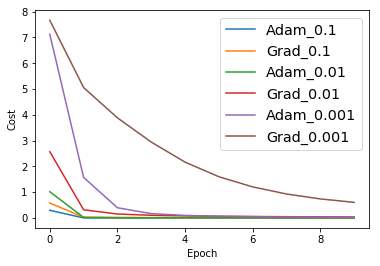

In [43]:
    plt.xlabel('Epoch')
    plt.ylabel('Cost')
    
    plt.plot(x1_1,label = 'Adam_0.1')
    plt.plot(x2_1,label = 'Grad_0.1')
    plt.plot(x1_2,label = 'Adam_0.01')
    plt.plot(x2_2,label = 'Grad_0.01')
    plt.plot(x1_3,label = 'Adam_0.001')
    plt.plot(x2_3,label = 'Grad_0.001')
    plt.legend(fontsize='x-large')
    plt.show()

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

learning_rate1 = 0.1
learning_rate2 = 0.01
learning_rate3 = 0.001

class Model_Grad:
    def __init__(self, sess, name, learning_rate):
        self.sess = sess
        self.name = name
        self.learning_rate = learning_rate
        self._build_net()
        
    def _build_net(self):
        with tf.variable_scope(self.name):
            self.X = tf.placeholder(tf.float32, [None, 3])
            self.Y = tf.placeholder(tf.float32, [None, 8])

            W1 = tf.Variable(tf.random_normal([3, 24]))
            b1 = tf.Variable(tf.random_normal([24]))

            W2 = tf.Variable(tf.random_normal([24, 8]))
            b2 = tf.Variable(tf.random_normal([8]))

            h1 = tf.matmul(self.X, W1) + b1

            self.logits = tf.matmul(h1, W2) + b2

        # define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
            logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.GradientDescentOptimizer(
            learning_rate=self.learning_rate).minimize(self.cost)

        correct_prediction = tf.equal(
            tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test):
        return self.sess.run(self.logits, feed_dict={self.X: x_test})

    def get_accuracy(self, x_test, y_test):
        return self.sess.run(self.accuracy, feed_dict={self.X: x_test, self.Y: y_test})

    def train(self, x_data, y_data):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
            self.X: x_data, self.Y: y_data})

class Model_Adam:
    def __init__(self, sess, name, learning_rate):
        self.sess = sess
        self.name = name
        self.learning_rate = learning_rate
        self._build_net()

    def _build_net(self):
        with tf.variable_scope(self.name):
            self.X = tf.placeholder(tf.float32, [None, 3]) # 데이터를 저장하는 일종의 통
            self.Y = tf.placeholder(tf.float32, [None, 8])
            
            W1 = tf.Variable(tf.random_normal([3, 24]))
            b1 = tf.Variable(tf.random_normal([24]))

            W2 = tf.Variable(tf.random_normal([24, 8]))
            b2 = tf.Variable(tf.random_normal([8]))

            h1 = tf.matmul(self.X, W1) + b1

            self.logits = tf.matmul(h1, W2) + b2

        # define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
            logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(
            learning_rate=self.learning_rate).minimize(self.cost)

        correct_prediction = tf.equal(
            tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test):
        return self.sess.run(self.logits, feed_dict={self.X: x_test})

    def get_accuracy(self, x_test, y_test):
        return self.sess.run(self.accuracy, feed_dict={self.X: x_test, self.Y: y_test})

    def train(self, x_data, y_data):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
            self.X: x_data, self.Y: y_data})


if __name__ == "__main__":
    X = tf.placeholder(tf.float32, [None, 3])
    Y = tf.placeholder(tf.float32, [None, 8])

    W1 = tf.Variable(tf.random_normal([3, 24]))
    b1 = tf.Variable(tf.random_normal([24]))

    W2 = tf.Variable(tf.random_normal([24, 8]))
    b2 = tf.Variable(tf.random_normal([8]))

    batch = 100
    epoch = 10
    startNumber = 0

    data = np.loadtxt('TrainDataset.csv', delimiter=',', dtype=np.float32)
    train_x_data = data[:, 0:-1]
    train_y_data = data[:, [-1]]
    train_y_data_onehot = []

    data = np.loadtxt('TrainDataset_03.csv', delimiter=',', dtype=np.float32)
    train_x_data_03 = data[:, 0:-1]
    train_y_data_03 = data[:, [-1]]
    train_y_data_03_onehot = []

    print("데이터 총 개수 : ", len(train_y_data_03))
    for i in range(len(train_y_data)):
        train_y_data_onehot.append(RetrunOneHot(train_y_data[i]))
    for i in range(len(train_y_data_03)):
        train_y_data_03_onehot.append(RetrunOneHot(train_y_data_03[i]))

    maxBatch = int(len(train_x_data) / batch)

    print("batch size   = ", batch)
    print("batch Number = ", maxBatch)
    count = 0
    sess = tf.Session()

    m1_1 = Model_Adam(sess, "m1_1",learning_rate1)
    m2_1 = Model_Grad(sess, "m2_1",learning_rate1)
    m1_2 = Model_Adam(sess, "m1_2",learning_rate2)
    m2_2 = Model_Grad(sess, "m2_2",learning_rate2)
    m1_3 = Model_Adam(sess, "m1_3",learning_rate3)
    m2_3 = Model_Grad(sess, "m2_3",learning_rate3)
    
    x1_1 = []
    x2_1 = []
    x1_2 = []
    x2_2 = []
    x1_3 = []
    x2_3 = []
    
    sess.run(tf.global_variables_initializer())

    for i in range(epoch):  # 10 번 반복
        Eavg = 0.
        Eavg2 = 0.
        Eavg_2 = 0.
        Eavg2_2 = 0.
        Eavg_3 = 0.
        Eavg2_3 = 0.
        startNumber = 0
        for j in range(maxBatch):  # 200번 반복
            x_batch = train_x_data[startNumber:startNumber + 100]
            y_batch = train_y_data_onehot[startNumber:startNumber + 100]
            x_batch2 = train_x_data_03[startNumber:startNumber + 100]
            y_batch2 = train_y_data_03_onehot[startNumber:startNumber + 100]
            if (len(x_batch) != 0):
                cost_val, _ = m1_1.train(x_batch2,y_batch2)
                cost_val2, _ = m2_1.train(x_batch2,y_batch2)
                cost_val_2, _ = m1_2.train(x_batch2,y_batch2)
                cost_val2_2, _ = m2_2.train(x_batch2,y_batch2)
                cost_val_3, _ = m1_3.train(x_batch2,y_batch2)
                cost_val2_3, _ = m2_3.train(x_batch2,y_batch2)
                Eavg += cost_val
                Eavg2 += cost_val2
                Eavg_2 += cost_val_2
                Eavg2_2 += cost_val2_2
                Eavg_3 += cost_val_3
                Eavg2_3 += cost_val2_3
                startNumber = startNumber + 100
        print("Epoch ", i + 1, "Eavg_Adam_1 : ", Eavg / maxBatch)
        x1_1.append(Eavg / maxBatch)
        print("Epoch ", i + 1, "Eavg_Grad_1 : ", Eavg2 / maxBatch)
        x2_1.append(Eavg2 / maxBatch)
        print("Epoch ", i + 1, "Eavg_Adam_2 : ", Eavg_2 / maxBatch)
        x1_2.append(Eavg_2 / maxBatch)
        print("Epoch ", i + 1, "Eavg_Grad_2 : ", Eavg2_2 / maxBatch)
        x2_2.append(Eavg2_2 / maxBatch)
        print("Epoch ", i + 1, "Eavg_Adam_2 : ", Eavg_3 / maxBatch)
        x1_3.append(Eavg_3 / maxBatch)
        print("Epoch ", i + 1, "Eavg_Grad_2 : ", Eavg2_3 / maxBatch)
        x2_3.append(Eavg2_3 / maxBatch)
        

데이터 총 개수 :  20000
batch size   =  100
batch Number =  200
Epoch  1 Eavg_Adam_1 :  0.6532569713890553
Epoch  1 Eavg_Grad_1 :  0.771490622907877
Epoch  1 Eavg_Adam_2 :  1.2063967721164226
Epoch  1 Eavg_Grad_2 :  2.522497225701809
Epoch  1 Eavg_Adam_2 :  11.399569628238678
Epoch  1 Eavg_Grad_2 :  9.567883896827698
Epoch  2 Eavg_Adam_1 :  0.4306235882639885
Epoch  2 Eavg_Grad_1 :  0.3913399743288755
Epoch  2 Eavg_Adam_2 :  0.38476170748472216
Epoch  2 Eavg_Grad_2 :  0.5465873676538467
Epoch  2 Eavg_Adam_2 :  2.936469352245331
Epoch  2 Eavg_Grad_2 :  5.5435196185112
Epoch  3 Eavg_Adam_1 :  0.4161588852107525
Epoch  3 Eavg_Grad_1 :  0.3809793273359537
Epoch  3 Eavg_Adam_2 :  0.37906982719898225
Epoch  3 Eavg_Grad_2 :  0.4562728162109852
Epoch  3 Eavg_Adam_2 :  0.942332673072815
Epoch  3 Eavg_Grad_2 :  3.3903998732566833
Epoch  4 Eavg_Adam_1 :  0.41279923528432844
Epoch  4 Eavg_Grad_1 :  0.37812969103455546
Epoch  4 Eavg_Adam_2 :  0.37907334573566914
Epoch  4 Eavg_Grad_2 :  0.4252756720781326

In [39]:
    test = np.loadtxt('TestDataset.csv', delimiter=',', dtype=np.float32)
    test_x_data = test[:, 0:-1]
    test_y_data = test[:, [-1]]
    test_y_data_onehot = []
    for i in range(len(test_y_data)):
        test_y_data_onehot.append(RetrunOneHot(test_y_data[i]))

    test = np.loadtxt('TestDataset_03.csv', delimiter=',', dtype=np.float32)
    test_x_data_03 = test[:, 0:-1]
    test_y_data_03 = test[:, [-1]]
    test_y_data_03_onehot = []

    for i in range(len(test_y_data_03)):
        test_y_data_03_onehot.append(RetrunOneHot(test_y_data_03[i]))

    startNumber = 0
    Aavg = 0.
    Aavg2 = 0.
    Aavg_2 = 0.
    Aavg2_2 = 0.
    Aavg_3 = 0.
    Aavg2_3 = 0.
    a = 0
    for i in range(len(test_x_data)): # 200번 반복
        x_batch = test_x_data[startNumber:startNumber+batch]
        y_batch = test_y_data_onehot[startNumber:startNumber+batch]
        x_batch2 = test_x_data_03[startNumber:startNumber+batch]
        y_batch2 = test_y_data_03_onehot[startNumber:startNumber+batch]
        if(len(x_batch)!= 0):
            accuracy = m1_1.get_accuracy(x_batch2, y_batch2)
            accuracy2 = m2_1.get_accuracy(x_batch2, y_batch2)
            accuracy_2 = m1_2.get_accuracy(x_batch2, y_batch2)
            accuracy2_2 = m2_2.get_accuracy(x_batch2, y_batch2)
            accuracy_3 = m1_3.get_accuracy(x_batch2, y_batch2)
            accuracy2_3 = m2_3.get_accuracy(x_batch2, y_batch2)
            if(a == 0):
                print("Label : ", np.argmax(y_batch, axis=1))
                print("pred : ", np.argmax(pred, axis=1))
                a += 1
            Aavg = Aavg + accuracy
            Aavg2 = Aavg2 + accuracy2    
            Aavg_2 += accuracy_2
            Aavg2_2 += accuracy2_2
            Aavg_3 += accuracy_3
            Aavg2_3 += accuracy2_3
            
            startNumber = startNumber + 100

    print("Aavg_1 : {}%".format((float(Aavg)/len(test_x_data))*10000))
    print("Aavg2_1 : {:.4f}%".format((float(Aavg2) / len(test_x_data))*10000))
    print("Aavg_2 : {}%".format((float(Aavg_2)/len(test_x_data))*10000))
    print("Aavg2_2 : {:.4f}%".format((float(Aavg2_2) / len(test_x_data))*10000))
    print("Aavg_3 : {}%".format((float(Aavg_3)/len(test_x_data))*10000))
    print("Aavg2_3 : {:.4f}%".format((float(Aavg2_3) / len(test_x_data))*10000))

Label :  [1 1 1 5 6 4 1 2 6 4 5 3 2 6 3 1 3 3 6 1 4 6 3 2 7 3 1 1 7 0 4 7 7 3 2 1 6
 6 1 6 3 3 4 7 4 4 6 5 4 1 3 5 2 3 3 1 0 4 7 3 4 2 6 3 2 4 6 6 5 7 2 2 1 6
 7 6 2 0 6 1 7 2 7 3 5 7 2 7 5 1 7 0 6 3 3 6 3 5 4 6]
pred :  [3 1 1 4 2 2 7 7 6 3 1 0 5 6 5 2 1 5 4 7 6 6 5 7 6 7 0 2 4 7 2 1 7 1 4 1 1
 6 1 2 1 2 3 4 7 3 3 4 1 2 7 7 1 0 7 5 5 6 0 5 2 1 0 4 6 2 4 5 3 7 5 7 4 2
 7 2 2 1 1 7 4 0 2 6 6 0 1 1 7 5 1 5 6 1 1 1 6 0 3 4]
Aavg_1 : 85.89999914169313%
Aavg2_1 : 87.4000%
Aavg_2 : 86.700000166893%
Aavg2_2 : 87.4000%
Aavg_3 : 86.49999916553496%
Aavg2_3 : 77.1000%


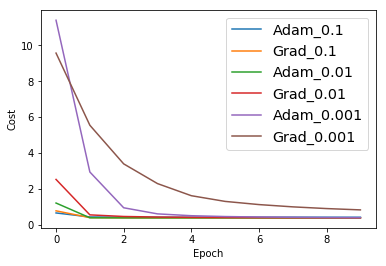

In [38]:
    plt.xlabel('Epoch')
    plt.ylabel('Cost')
    
    plt.plot(x1_1,label = 'Adam_0.1')
    plt.plot(x2_1,label = 'Grad_0.1')
    plt.plot(x1_2,label = 'Adam_0.01')
    plt.plot(x2_2,label = 'Grad_0.01')
    plt.plot(x1_3,label = 'Adam_0.001')
    plt.plot(x2_3,label = 'Grad_0.001')
    plt.legend(fontsize='x-large')
    plt.show()

In [0]:
import tensorflow as tf
#W1 = tf.Variable(tf.random_normal([3, 24]))
#W1 = tf.get_variable("W1", shape=[3,24], initializer=tf.contrib.layers.xavier_initializer())
#W1 = tf.get_variable("W1", shape=[3, 24], initializer=tf.compat.v1.initializers.he_normal())


#https://www.tensorflow.org/api_docs/python/tf/contrib/layers/xavier_initializer
#https://www.tensorflow.org/api_docs/python/tf/initializers/he_normal